# 从头实现一个神经网络
神经网络其实就是把多个神经元连在一起，形成一个网络。上一层神经元的输出作为下一层神经元的输入。
下图就是一个神经网络示意图，红色和蓝色的节点就是神经元，这是一个简单的神经网络，复杂的网络无非就是输入多一些，隐层多一些而已，本质上还是这样的。
<img src="https://raw.githubusercontent.com/fioccy/pics/master/Machine%20Learning%20for%20Beginners-An%20Introduction%20to%20Neural%20Networks/20190902170213.png" width="500" hegiht="313" align=center/>

## 1.神经元
神经元是神经网络的基本单元，一个神经元可以理解为对所有的输入值$(x)$加权$(w)$，然后相加，再加上偏置($\theta$),得到这一组输入的计算值，再将计算值代入到激活函数中，得到这个神经元的输出。计算值可以理解为神经元的输入所产生的刺激的强度，神经元的输出可以理解为神经元对于这个强度的刺激是否作出反应。
<img src="https://gss2.bdstatic.com/-fo3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike80%2C5%2C5%2C80%2C26/sign=27a32abe59fbb2fb202650402e234bc1/8cb1cb1349540923a319419d9e58d109b2de49e4.jpg" width="500" hegiht="313" align=center />
最原始的激活函数是阶跃函数，其函数图像如下：
<img src="https://ss0.bdstatic.com/70cFvHSh_Q1YnxGkpoWK1HF6hhy/it/u=3241984634,2952446636&fm=26&gp=0.jpg" width="500" hegiht="313" align=center />
这与人类的神经元的工作方式类似，即当刺激强度足够的时候，我就作出响应（输出1），当刺激强度不够的时候，我就不响应（输出0）。
但是这个函数不是连续可导的，现在常用的激活函数是**Sigmoid函数**，其函数图像如下所示：
<img src="https://gss1.bdstatic.com/-vo3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike116%2C5%2C5%2C116%2C38/sign=662513026ed9f2d3341c2cbdc885e176/730e0cf3d7ca7bcb1797ebccb2096b63f724a860.jpg" width="500" hegiht="313" align=center />
Sigmoid函数的优点有单增，连续可导，其导数也单增等，因此十分适合用来做激活函数。
除了Sigmoid函数，其他常用的激活函数还有：

**Tanh函数** 
<img src="https://gss0.bdstatic.com/94o3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike72%2C5%2C5%2C72%2C24/sign=5484883dfc1f3a294ec5dd9cf84cd754/b64543a98226cffcc6c79651b5014a90f703ea60.jpg" width="500" hegiht="313" align=center />

**ReLU函数** 
<img src="https://gss0.bdstatic.com/-4o3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike80%2C5%2C5%2C80%2C26/sign=9df52608bafd5266b3263446ca71fc4e/f31fbe096b63f624775e13e08b44ebf81b4ca3d5.jpg" width="500" hegiht="313" align=center />
为了方便，我们以拥有两个输入的神经元为例进行讲解。
<img src="https://github.com/fioccy/pics/raw/master/Machine%20Learning%20for%20Beginners-An%20Introduction%20to%20Neural%20Networks/20190902204119.png" width="500" hegiht="313" align=center />
如图所示，这是一个拥有两个输入$x_1$和$x_2$的神经元，每个输入对应的权重为$\omega_1$和$\omega_2$，偏置设为$b$，则这个神经元对输入的计算值为
$$(x_1\times\omega_1)+(x_2\times\omega_2)+b$$
将上式代入激活函数得到该神经元的输出：
$$y = f((x_1\times\omega_1)+(x_2\times\omega_2)+b)$$
假设该神经元的两个权重$\omega_1 = 0$，$\omega_2 = 1$，偏置$b = 4$，输入$x_1 = 2$,$x_2 = 3$,将上述值代入神经元公式，得到计算值为：
$$ \begin{align*} \omega_1\times x_1+\omega_2\times x_2+b &= 0\times2 +1\times3 +4\\&= 7\end{align*}$$
将计算值7代入激活函数Sigmoid，$Sigmoid(7)=\boxed{0.99}$。也就是说这个神经元对这一组输入$\begin{bmatrix}2&3\end{bmatrix}$的输出是0.99。**这种给定输入，得到输出的过程被称之为前馈。**

### 编码实现一个神经元
使用NumPy库来帮助实现神经元。通过上边的描述可以知道，一个神经元干的事情就是对输入加权，然后加上偏置，将此计算值代入激活函数得到最终的神经元输出。输入是由外部提供的，那么神经元自身的属性其实就是权重和偏置，神经元的函数（即神经元功能）即是实现上述的计算过程，得到输出。
通过定义一个神经元类，将神经元的权重和偏置作为类的属性，生成一个具体的神经元对象的时候通过初始化函数指定该神经元的权重和偏置的具体值。还定义了前馈的具体实现，即将输入乘以权重之后相加，再加上偏置，得到计算值，将此计算值代入激活函数sigmoid，得到神经元的输出。一个基本的神经元大概就包含这些内容。

In [2]:
import numpy as np
# sigmoid激活函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 神经元类
class Neuron():
#     初始化，一个神经元其实就两个参数，每个输入的权重和偏置，这是为了方便理解故意写的比较原始
#其实偏置也可以放到权重向量里，通常记为 w_0，它的输入为 x_0 = 1，这样的话神经元就只有一个参数-权重。
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    #定义了神经元的前馈函数，即将输入与权重相乘再加上偏置，得到的计算值再代入激活函数中，得到神经元的最终输出    
    def feedforward(self, inputs):
        #这步先计算神经元的输入的计算值，利用numpy的向量点积进行计算
        total = np.dot(self.weights, inputs) + self.bias
       #代入到激活函数sigmoid中，得到神经元的输出值
        return sigmoid(total)

if __name__ == "__main__":
#用np库的array函数生成向量 
#神经元的权重，这里只设置了2个权重，2个输入
    weights = np.array([0,1])
    bias = 4  #偏置
    
    myNeuron = Neuron(weights, bias)
    x = np.array([2,3])  #两个输入
    neuron_output = myNeuron.feedforward(x)
    print(neuron_output)

0.9990889488055994


## 2.将神经元组成神经网络
神经网络就是将神经元彼此连接，上一层神经元的输出作为下一层神经元的输入。还是以有两个输入的神经元为例进行说明。下图展示了一个最简单的神经网络的构成。这个神经网络有两个输入，一个隐层包含2个神经元（$h_1$和$h_2$），一个输出层，包含1个神经元（$o_1$）。$h_1$和$h_2$的输出是$o_1$的输入。
> 隐层是指输入和输出之间的层，可以有很多层。所谓深度学习就是隐层数很多的神经网络

<img src="https://victorzhou.com/network-77ed172fdef54ca1ffcfb0bba27ba334.svg" width="500" hegiht="313" align=center />

### 前馈
现在假设每个神经元的权重均为$\omega=[0,1]$，偏置$bias$均为0，且激活函数都为sigmoid函数。那么如果输入$x=[2,3]$，整个神经网络的输出会是多少？

+ 先算$h_1$和$h_2$：
$$ \begin{align*} h_1= h_2  &= sigmoid(0\times2 +1\times3 +0)\\&= sigmoid(3)\\&=0.9526\end{align*}$$
+ 再算$o_1$：
$$ \begin{align*} o_1  &= sigmoid(0\times 0.9526 +1\times0.9526 +0)\\&= sigmoid(0.9526)\\&=\boxed{0.7216}\end{align*}$$

可以看到对于输入$x=[2,3]$，整个神经网络的输出为0.7216
一个神经网络可以有任意多个层和任意多个神经元，但是其工作的基本流程都是一样的，一层一层的算，上一层的输出作为下一层的输入，最终得到整个神经网络的输出。

### 编码实现一个神经网络

In [3]:
'''
因为这个cell里调用了上一个cell定义的Neuron类且使用的NumPy库也是在上一个cell里导入的
因此如果上边的cell已经运行过了，则可以直接运行该cell，如果这次打开这个notebook以来，上一个cell还没运行过，则需要先运行上边的cell才能运行该cell
'''
#神经网络的类
class OurNeuralNetwork():
    #初始化函数，神经网络是由神经元组成的，因此初始化神经网络就是要初始化其中的神经元
    #根据假设，该神经网络由h1，h2和o1共3个神经元组成，每个神经元的权重均为w1=0,w2=1，bias=0
    #这里调用了上一个cell里定义的Neuron类来初始化神经元
    def __init__(self):
        weights = np.array([0,1])
        bias = 0
        
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    
    #定义这个神经网络的前馈，其实就是一层层求值的过程。先计算h1和h2的输出值，然后将h1和h2的输出作为o1的输入，计算得到网络最终的输出值
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

#生成一个实例
network = OurNeuralNetwork()
# 设置网络的输入
x = np.array([2,3])
# 调用前馈函数得到网络的输出
print(network.feedforward(x))

0.7216325609518421


可以看到程序输出也是0.7216，与我们之前的推导是一致的。

## 3.训练神经网络（第一部分）
如果我们有如下的输入：

Name|Weight|Height|Gender
-|-|-|-
Alice|133|65|F
Bob|160|72|M
Charlie|152|70|M
Diana|120|60|F

现在希望通过身高和体重来预测性别。还是使用上边的那个有两个输入，一个隐层，一个输出的神经网络。使用0表示Male，1表示Female，并对表中的数据进行归一处理。得到如下的数据表：

|Name|Weight(减去135)|Height(减去66)|Gender|
|-|:-:|:-:|:-:|
|Alice|-2|-1|1|
|Bob|25|6|0|
|Charlie|17|4|0|
|Diana|-15|-6|1|

### 损失函数
使用神经网络进行预测，需要衡量其预测的好不好，一般会定义一个**损失函数**来对其进行度量。这里我们选用均方差（MSE）作为损失函数：
$$MSE=\frac1n\sum_{i=1}^n{(y_{true}-y_{pred})^2}\tag{3.1}$$
其中：
+ $n$代表样本的个数，即为4
+ $y$代表被预测的值，即为性别
+ $y_{true}$是样本真实值
+ $y_{pred}$是神经网络计算输出值

好的网络就是预测值与真实值最接近的网络，也就是损失函数（均方差）最小的网络。因此：
**所谓训练网络，其实就是调整网络的参数，使其损失函数最小**
### 计算损失函数的例子
假设我们的网络永远输出0，那么对于上边的数据，其损失函数是多少？

|Name|$y_{true}$|$y_{pred}$|$(y_{true}-y_{pred})^2$|
|-|:-:|:-:|:-:|
|Alice|1|0|1|
|Bob|0|0|0|
|Charlie|0|0|0|
|Diana|1|0|1|

根据表格，代入MSE公式，可计算得到：
$$MSE=\frac{1}{4}(1+0+0+1)=\boxed{0.5}$$

### 编码实现损失函数

In [5]:
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()

if __name__ == '__main__':
    y_true=np.array([1,0,0,1])
    y_pred=np.array([0,0,0,0])
    print(mse_loss(y_true, y_pred))

0.5


## 4.训练神经网络（第二部分）
训练神经网络就是调整网络的参数，使其预测值最接近实际值，即最小化损失函数。但是问题是，该如何调整参数？
为了简单起见，先假设数据集中只有一个样本Alice：

Name|Weight|Height|Gender
-|-|-|-
Alice|-2|-1|1

这种情况下，网络的误差为：
$$
\begin{split}L=MSE &= \frac{1}{1}\sum_{i=1}^1{(y_{true}-y_{pred})^2}\\
&=(y_{true}-y_{pred})^2\\
&=(1-y_{pred})^2
\end{split} \tag{4.1}
$$

将网络的权重和偏置都标记出来，网络图是这样的：
<img src="https://victorzhou.com/network3-27cf280166d7159c0465a58c68f99b39.svg" width="500" hegiht="313" align=center />
从上边的推导可以看出，网络的损失(MSE)是$y_{pred}$的函数，由网络的定义可知，$y_{pred}$又可以看做是输入权重$\omega_1, \omega_2,\omega_3，\omega_4，\omega_5，\omega_6$和偏置$b_1,b_2,b_3$的函数。
**这里要转换一下思路，当权重和偏置未改变的时候，网络的变量是输入$x$，给不同的输入，网络输出不同的值。而现在我们要考虑的是改变权重和偏置，使得网络在同样的输入$x$的情况下，输出值变化（更接近真实值），也就是说此时，我们应该将网络的损失函数看做是权重和偏置的函数，记为：**

$$L(\omega_1,\omega_2,\omega_3,\omega_4,\omega_5,\omega_6,b_1,b_2,b_3)$$

假设我们要通过改变$\omega_1$来使得网络损失函数$L()$变化，那么该如何改变它的值呢？显然不能乱变，我们的目的是降低网络的损失，也就是说我们希望通过改变$\omega_1$来减小MSE，这里自然就会用到**梯度**的概念。

### 梯度
关于梯度的理解和学习，可以参考[深入浅出--梯度下降法及其实现](https://www.jianshu.com/p/c7e642877b0e)这篇文章。基本上已经讲的很明白了。

通过计算损失函数$L$对$\omega_1$的偏导，来指导进行对$\omega_1$的微调。根据求导公式可以得出：
$$\frac{\partial L}{\partial\omega_1}=\frac{\partial L}{\partial y_{pred}}\times\frac{\partial y_{pred}}{\partial \omega_1}\tag{4.2}$$
其中，由公式4.1，可以得出：
$$\frac{\partial L}{\partial y_{pred}}=\boxed{-2\times(1-y_{pred})} \tag{4.3}$$
为了方便表示，对于神经元$a$，记其输入乘以加权再加上偏置为$V_a$，即$V_{o_1}=\omega_5\times h_1+\omega_6\times h_2+b_3$,再由神经网络的计算过程可以得出$y_{pred}=Sigmoid(V_{o_1})$，所以：
$$\frac{\partial y_{pred}}{\partial \omega_1}=\frac{\partial S}{\partial V_{o_1}}\times\frac{\partial V_{o_1}}{\partial \omega_1} \tag{4.4}$$
已知$Sigmoid$函数的导数形式为$S'(x)=S(x)\times(1-S(x))$，所以
$$\frac{\partial S}{\partial V_{o_1}}={S(V_{o_1})\times(1-S(V_{o_1}))}=\boxed{o_1\times(1-o_1)}\tag{4.5}$$
现在来看$\frac{\partial V_{o_1}}{\partial \omega_1}$，由神经网络计算过程可知，只有$h_1$与$\omega_1$有关，因此
$$\begin{split}\frac{\partial V_{o_1}}{\partial \omega_1}&=\frac{\partial V_{o_1}}{\partial h_1}\times\frac{\partial h_1}{\partial \omega_1}\end{split}$$
已知$V_{o_1}=\omega_5\times h_1+\omega_6\times h_2+b_3$，因此
$$\frac{\partial V_{o_1}}{\partial h_1} = \boxed{\omega_5}\tag{4.6}$$
已知$h_1=S(V_{h_1})=S(\omega_1\times x_1+\omega_2\times x_2+b_1)$，因此
$$\begin{split}\frac{\partial h_1}{\partial \omega_1} &= \frac{\partial S}{\partial V_{h_1}}\times\frac{\partial V_{h_1}}{\omega_1}\\
&= {S(V_{h_1})\times(1-S(V_{h_1}))\times x_1}\\
&=\boxed{h_1\times(1-h_1)\times x_1}\end{split}\tag{4.7}$$
这种通过向后计算来求偏导的方式就是传说中的**反向传播** ,通过上边的推导，我们就把损失函数$L$对$\omega_1$的偏导分解成了几个可以计算的部分（上边公式中框起来的部分）。下边实际计算一下。

### 实际计算一下偏导
继续假设数据中只有Alice一个样本。

|Name|Weight|Height|Gender|
|-|:-:|:-:|:-:|
|Alice|-2|-1|1

先假设所有的权重均为1，所有的偏置均为0，先计算一下网络的输出：
$$\begin{split}h_1&=S(\omega_1\times x_1+\omega_2\times x_2+b_1)\\
&=S(-2-1+0)\\
&=0.0474\end{split}
$$

$h_2$的输入、权重与偏置均与$h_1$一致，因此$h_2=0.0474$。下边计算$o_1$:
$$\begin{split}o_1&=S(\omega_5\times h_1+\omega_6\times h_2+b_3)\\
&=S(0.0474+0.0474)\\
&=0.524\end{split}
$$
神经网络输出的结果为0.524，对男(0)或女(1)没有很强的指向性。
现在开始计算$\frac{\partial L}{\partial \omega_1}$。根据上边的推导
$$\begin{split}\frac{\partial L}{\partial y_{pred}}&=-2\times(1-y_{pred})\\
&=-2\times(1-0.524)\\
&=\boxed {-0.952}
\end{split}$$

$$\begin{split}\frac{\partial S}{\partial o_{1}}&=o_1\times(1-o_1)\\
&=0.524\times(1-0.524)\\
&=\boxed {0.249424}
\end{split}$$

$$\begin{split}\frac{\partial V_{o_1}}{\partial h_{1}}&=\omega_5\\
&=\boxed 1
\end{split}$$

$$\begin{split}\frac{\partial h_1}{\partial \omega_{1}}&=h_1\times(1-h_1)\times x_1\\
&=0.0474\times(1-0.0474)\times-2\\
&=\boxed {-0.09030648}
\end{split}$$
所以，最终得到的$\frac{\partial L}{\partial \omega_1}$的值为$-0.952\times0.249424\times1\times-0.09030648=0.02144$
损失函数$L$对$\omega_1$的偏导为0.02144，意味着$\omega_1$的增加会导致$L$也随之增加（一点点点点）。

### 随机梯度下降（Stochastic Gradient Descent）
随机梯度下降法之所以带“随机”两个字，是因为**随机梯度下降**的工作方式是代入一个样本得到神经网络输出值之后，就利用反向传播对网络参数进行修正，然后再利用修正后的参数去计算下一个样本，以此类推。而**梯度下降**的工作方式则是将所有样本都训练完成后，根据公式（3.1）计算网络误差并按照反向传播的思路去更新网络参数，在梯度下降方法中，数据集中的样本全部算完一次之后再更新网络，每个样本都对更新参数做了贡献。  
总结来说就是： <br/>
**随机梯度下降**：计算完一个样本更新一次网络 <br/>
**梯度下降**：计算完数据集里的所有样本后，更新一次网络 <br/>
这两种方法各有利弊，随机梯度下降计算量小，但是每次更新的方向不是特别准确，需要的迭代次数多（理论上证明随机梯度下降是能够找到最小值的），而梯度下降则方向准确，但计算量大。在神经网络中，一般使用随机梯度下降法。现在我们使用随机梯度下降法（SGD）来对网络进行优化。  
优化的基本公式是：  
$$
\omega_1\leftarrow\omega_1-\eta\frac{\partial L}{\partial \omega_1}
$$
其中，$\eta$被称为**学习率**（其实就是在进行梯度下降的时候，每一步的步长）。学习率是机器学习中一个非常常见和重要的一个超参。学习率过大会导致可能错过极值点，学习率过小则会导致迭代速度过慢。  
在上边的公式中，如果偏导为正（即$L$与$\omega_1$正相关），则通过公式，$\omega_1$减小，$L$也随之减小，如果偏导为负(即$L$与$\omega_1$正相关)，则通过公式，$\omega_1$增加，同样会导致$L$减小。

如果对每个参数和偏置均使用上边的公式进行修正，则损失函数会逐步下降，网络表现也会越来越好。  

因此训练网络的过程即为：  
1. 从数据中选取一个样本
2. 计算损失函数对每个参数和偏置的偏导（$\frac{\partial L}{\partial \omega_1}$、$\frac{\partial L}{\partial \omega_2}$等等）
3. 利用更新公式更新网络参数
4. 重复上述步骤

现在来编码实现这个神经网络。
网络图如下：
<img src="https://victorzhou.com/network3-27cf280166d7159c0465a58c68f99b39.svg" width="500" hegiht="313" align=center />
网络输入如下：

|Name|Weight(减去135)|Height(减去66)|Gender|
|-|:-:|:-:|:-:|
|Alice|-2|-1|1|
|Bob|25|6|0|
|Charlie|17|4|0|
|Diana|-15|-6|1|

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# sigmoid激活函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

#MSE损失函数
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()

class ourNeuralNet:
    #初始化函数，这个网络有6个权重，3个偏置
    def __init__(self):
        #从正态分布中随机选值,初始化网络的6个权重和3个偏置
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
        
        #用于存储每次训练时，网络的损失值
        self.trainnum = []
        self.loss = []
     #网络的前馈函数   
    def feedforward(self,x):
        h1 = sigmoid(self.w1*x[0]+self.w2*x[1]+self.b1)
        h2 = sigmoid(self.w3*x[0]+self.w4*x[1]+self.b2)
        o1 = sigmoid(self.w5*h1+self.w6*h2+self.b3)
        return o1
    
    #训练函数，训练一个网络需要数据集，这里将数据集分成输入集data和值集all_y_trues
    def train(self, data, all_y_trues):
        learn_rate = 0.1 #定义学习率为0.1
        epochs = 1000 #在整个输入集上迭代1000次
        loss = []
        
        #迭代1000次，其实这里可以用损失函数小于一个极小值来做判据更合适
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                #计算每个神经元的计算值和输出值
                v_h1 = self.w1*x[0]+self.w2*x[1]+self.b1
                h1 = sigmoid(v_h1)
                
                v_h2 = self.w3*x[0]+self.w4*x[1]+self.b2
                h2 = sigmoid(v_h2)
                
                v_o1 = self.w5*h1+self.w6*h2+self.b3
                o1 = sigmoid(v_o1)
                y_pred = o1
                
                self.trainnum.append(epoch)
                self.loss.append(mse_loss(y_true, y_pred))
               
                #利用上边推导的公式，计算输出值对各个参数和偏置的偏导
                #由公式（4.3）
                
                #损失函数L对y_pred的偏导
                d_L_d_ypred = -2*(y_true-y_pred)
                
                
                d_o1_d_vo1 = o1*(1-o1)
                
                d_vo1_d_h1 = self.w5
                d_vo1_d_h2 = self.w6
                
                
                d_h1_d_w1 = h1*(1-h1)*x[0]
                d_h1_d_w2 = h1*(1-h1)*x[1]
                d_h1_d_b1 = h1*(1-h1)*1
                                
                d_h2_d_w3 = h2*(1-h2)*x[0]
                d_h2_d_w4 = h2*(1-h2)*x[1]
                d_h2_d_b2 = h2*(1-h2)*1
                
                d_vo1_d_w5 = h1
                d_vo1_d_w6 = h2
                d_vo1_d_b3 = 1
                
                #损失函数L对权重w1的偏导
                d_L_d_w1 = d_L_d_ypred*d_o1_d_vo1*d_vo1_d_h1*d_h1_d_w1
                #损失函数L对权重w2的偏导
                d_L_d_w2 = d_L_d_ypred*d_o1_d_vo1*d_vo1_d_h1*d_h1_d_w2
                #损失函数L对偏置b1的偏导
                d_L_d_b1 = d_L_d_ypred*d_o1_d_vo1*d_vo1_d_h1
                
                #损失函数对偏置b2的偏导
                d_L_d_b2 = d_L_d_ypred*d_o1_d_vo1*d_vo1_d_h2
                #损失函数L对权重w3的偏导
                d_L_d_w3 = d_L_d_ypred*d_o1_d_vo1*d_vo1_d_h2*d_h2_d_w3
                #损失函数L对权重w4的偏导
                d_L_d_w4 = d_L_d_ypred*d_o1_d_vo1*d_vo1_d_h2*d_h2_d_w4
                
                #损失函数对权重w5的偏导
                d_L_d_w5 = d_L_d_ypred*d_o1_d_vo1*d_vo1_d_w5
                #损失函数对权重w6的偏导
                d_L_d_w6 = d_L_d_ypred*d_o1_d_vo1*d_vo1_d_w6
                #损失函数对偏置b3的偏导
                d_L_d_b3 = d_L_d_ypred*d_o1_d_vo1*d_vo1_d_b3
                
                self.w1 -= learn_rate*d_L_d_w1
                self.w2 -= learn_rate*d_L_d_w2
                self.w3 -= learn_rate*d_L_d_w3
                self.w4 -= learn_rate*d_L_d_w4
                self.w5 -= learn_rate*d_L_d_w5
                self.w6 -= learn_rate*d_L_d_w6
                self.b1 -= learn_rate*d_L_d_b1
                self.b2 -= learn_rate*d_L_d_b2
                self.b3 -= learn_rate*d_L_d_b3
                
                if epoch %10 == 0:
                    y_preds = np.apply_along_axis(self.feedforward, 1, data)
                    loss = mse_loss(all_y_trues, y_preds)
                    print("Epoch %d loss: %.3f" % (epoch, loss))
   
    #画出每次迭代的损失函数
    def draw_loss_pic(self):
        plt.plot(self.trainnum,self.loss)
        plt.show()
        
data = np.array([[-2,-1],[25,6],[17,4],[-15,-6]])
all_y_trues = np.array([1,0,0,1])
#实例化这个网络
my_neural_net = ourNeuralNet()
#将实例输入网络，进行训练
my_neural_net.train(data, all_y_trues)

Epoch 0 loss: 0.483
Epoch 0 loss: 0.480
Epoch 0 loss: 0.477
Epoch 0 loss: 0.476
Epoch 10 loss: 0.356
Epoch 10 loss: 0.351
Epoch 10 loss: 0.345
Epoch 10 loss: 0.345
Epoch 20 loss: 0.235
Epoch 20 loss: 0.230
Epoch 20 loss: 0.225
Epoch 20 loss: 0.224
Epoch 30 loss: 0.148
Epoch 30 loss: 0.146
Epoch 30 loss: 0.144
Epoch 30 loss: 0.143
Epoch 40 loss: 0.101
Epoch 40 loss: 0.100
Epoch 40 loss: 0.099
Epoch 40 loss: 0.099
Epoch 50 loss: 0.073
Epoch 50 loss: 0.073
Epoch 50 loss: 0.073
Epoch 50 loss: 0.072
Epoch 60 loss: 0.056
Epoch 60 loss: 0.056
Epoch 60 loss: 0.055
Epoch 60 loss: 0.055
Epoch 70 loss: 0.044
Epoch 70 loss: 0.044
Epoch 70 loss: 0.044
Epoch 70 loss: 0.044
Epoch 80 loss: 0.036
Epoch 80 loss: 0.036
Epoch 80 loss: 0.036
Epoch 80 loss: 0.036
Epoch 90 loss: 0.031
Epoch 90 loss: 0.031
Epoch 90 loss: 0.030
Epoch 90 loss: 0.030
Epoch 100 loss: 0.026
Epoch 100 loss: 0.026
Epoch 100 loss: 0.026
Epoch 100 loss: 0.026
Epoch 110 loss: 0.023
Epoch 110 loss: 0.023
Epoch 110 loss: 0.023
Epoch 110 

Epoch 940 loss: 0.002
Epoch 940 loss: 0.002
Epoch 940 loss: 0.002
Epoch 950 loss: 0.002
Epoch 950 loss: 0.002
Epoch 950 loss: 0.002
Epoch 950 loss: 0.002
Epoch 960 loss: 0.002
Epoch 960 loss: 0.002
Epoch 960 loss: 0.002
Epoch 960 loss: 0.002
Epoch 970 loss: 0.002
Epoch 970 loss: 0.002
Epoch 970 loss: 0.002
Epoch 970 loss: 0.002
Epoch 980 loss: 0.002
Epoch 980 loss: 0.002
Epoch 980 loss: 0.002
Epoch 980 loss: 0.002
Epoch 990 loss: 0.002
Epoch 990 loss: 0.002
Epoch 990 loss: 0.002
Epoch 990 loss: 0.002


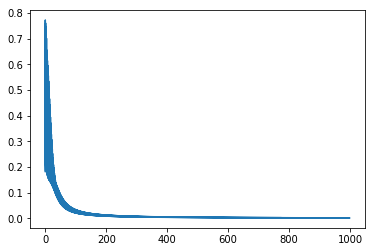

In [12]:
#画出损失函数随训练次数的参数
my_neural_net.draw_loss_pic()

通过上边的输出和图形可以看出，随着迭代的进行，损失函数的值不断降低。
至此，我们基本实现了一个完整的神经网络。做一下简单的回顾：
+ 神经元是神经网络的基本组成单元，神经元要做的事就是将输入乘以权重，加上偏置，代入激活函数并输出
 + 神经元的参数是权重和偏置，方法是激活函数
+ 神经网络是由一个一个神经元相互连接而成，形成一层一层的结构，上一层的神经元的输出作为下一层神经元的输入
 + 神经网络的层数可以随意，每层的神经元的数量也可以随意
 + 复杂的神经网络与简单的神经网络的基本原理都是一样的，只不过是层数多一些，每层的神经元数量多一些
+ 通过损失函数来评价一个神经网络的好坏，损失函数定义了神经网络的预测值与真实值之间的差距
 + 通过求损失函数对神经网络上各个参数和偏置的偏导，来更新参数
 + 常用的随机梯度下降法是指对每一个训练集中的样本，代入网络之后均进行一次网络参数的修正，然后使用修正后的参数计算下一个训练样本，如此循环
 + 学习率表示了参数更新的步长，不能过大也不能过小
+ 训练神经网络需要在训练集上迭代很多次，直到损失函数值极小或者迭代到足够多的次数